# Prepare a model for glass classification using KNN

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold,cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

import warnings
warnings.filterwarnings('ignore')

## Import the dataset 

In [2]:
data = pd.read_csv('glass.csv')
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## EDA 

In [3]:
data.shape

(214, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
data.Type.value_counts().sort_values(ascending=False)

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [7]:
corr = data.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


### From above correlation matrix, we can conclude that Ca & K has zero or no correlation with type(output). Hence, we will drop it for model building.

In [8]:
#Drop columns
data.drop(['Ca', 'K'], axis=1, inplace=True)

## Splitting the dataset 

In [9]:
X = data.iloc[:, :-1]
y = data.loc[:, 'Type']

In [10]:
X.shape

(214, 7)

## Feature Scaling

In [11]:
scaled_x = MinMaxScaler()
X = scaled_x.fit_transform(X)
X

array([[0.43283582, 0.43759398, 1.        , ..., 0.35178571, 0.        ,
        0.        ],
       [0.28358209, 0.47518797, 0.80178174, ..., 0.52142857, 0.        ,
        0.        ],
       [0.22080773, 0.42105263, 0.79064588, ..., 0.56785714, 0.        ,
        0.        ],
       ...,
       [0.41703248, 0.54586466, 0.        , ..., 0.64464286, 0.52063492,
        0.        ],
       [0.23529412, 0.54887218, 0.        , ..., 0.67857143, 0.4984127 ,
        0.        ],
       [0.26163301, 0.52631579, 0.        , ..., 0.63392857, 0.53015873,
        0.        ]])

## Model Building 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12, stratify=y, test_size=0.35)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((139, 7), (75, 7), (139,), (75,))

### Building Model with K = 5

In [14]:
knn_mod = KNeighborsClassifier(n_neighbors=5, metric='minkowski')

## Model Training & Evaluation 

In [15]:
knn_mod.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
y_pred_train = knn_mod.predict(X_train)

In [17]:
accuracy_score(y_train, y_pred_train)

0.7482014388489209

In [18]:
confusion_matrix(y_train, y_pred_train)

array([[43,  3,  0,  0,  0,  0],
       [11, 36,  0,  2,  0,  0],
       [ 9,  2,  0,  0,  0,  0],
       [ 0,  2,  0,  4,  0,  2],
       [ 0,  1,  0,  0,  5,  0],
       [ 0,  1,  0,  1,  1, 16]], dtype=int64)

In [19]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.68      0.93      0.79        46
           2       0.80      0.73      0.77        49
           3       0.00      0.00      0.00        11
           5       0.57      0.50      0.53         8
           6       0.83      0.83      0.83         6
           7       0.89      0.84      0.86        19

    accuracy                           0.75       139
   macro avg       0.63      0.64      0.63       139
weighted avg       0.70      0.75      0.72       139



## Model Testing & Evaluation

In [20]:
y_pred_test = knn_mod.predict(X_test)

In [21]:
accuracy_score(y_test, y_pred_test).round(3)

0.653

In [22]:
confusion_matrix(y_test, y_pred_test)

array([[18,  6,  0,  0,  0,  0],
       [ 7, 20,  0,  0,  0,  0],
       [ 3,  3,  0,  0,  0,  0],
       [ 0,  1,  0,  2,  0,  2],
       [ 0,  0,  0,  2,  1,  0],
       [ 1,  0,  0,  0,  1,  8]], dtype=int64)

In [23]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.62      0.75      0.68        24
           2       0.67      0.74      0.70        27
           3       0.00      0.00      0.00         6
           5       0.50      0.40      0.44         5
           6       0.50      0.33      0.40         3
           7       0.80      0.80      0.80        10

    accuracy                           0.65        75
   macro avg       0.51      0.50      0.50        75
weighted avg       0.60      0.65      0.62        75



### The accuracy of the model when K=5 for test data is 63%. Let's try with K=7 and check the accuracy. 

### Building Model with K = 7

In [24]:
knn_mod2 = KNeighborsClassifier(n_neighbors=7, metric='minkowski')

## Model Training & Evaluation 

In [25]:
knn_mod2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [26]:
y_pred_train = knn_mod2.predict(X_train)

In [27]:
accuracy_score(y_train, y_pred_train).round(3)

0.734

In [28]:
confusion_matrix(y_train, y_pred_train)

array([[42,  4,  0,  0,  0,  0],
       [ 7, 38,  0,  3,  0,  1],
       [ 7,  4,  0,  0,  0,  0],
       [ 0,  4,  0,  1,  1,  2],
       [ 0,  1,  0,  0,  5,  0],
       [ 0,  2,  0,  1,  0, 16]], dtype=int64)

In [29]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.75      0.91      0.82        46
           2       0.72      0.78      0.75        49
           3       0.00      0.00      0.00        11
           5       0.20      0.12      0.15         8
           6       0.83      0.83      0.83         6
           7       0.84      0.84      0.84        19

    accuracy                           0.73       139
   macro avg       0.56      0.58      0.57       139
weighted avg       0.66      0.73      0.70       139



## Model Testing & Evaluation

In [30]:
y_pred_test = knn_mod2.predict(X_test)

In [31]:
accuracy_score(y_test, y_pred_test).round(3)

0.613

In [32]:
confusion_matrix(y_test, y_pred_test)

array([[18,  6,  0,  0,  0,  0],
       [ 9, 18,  0,  0,  0,  0],
       [ 2,  4,  0,  0,  0,  0],
       [ 0,  2,  0,  1,  0,  2],
       [ 1,  0,  0,  0,  1,  1],
       [ 1,  0,  0,  0,  1,  8]], dtype=int64)

In [33]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.58      0.75      0.65        24
           2       0.60      0.67      0.63        27
           3       0.00      0.00      0.00         6
           5       1.00      0.20      0.33         5
           6       0.50      0.33      0.40         3
           7       0.73      0.80      0.76        10

    accuracy                           0.61        75
   macro avg       0.57      0.46      0.46        75
weighted avg       0.59      0.61      0.58        75



### The accuracy of the model when K=7 for test data drops down to 61%. Let's try with K=3 and check the accuracy. 

### When K = 3

In [34]:
knn_mod3 = KNeighborsClassifier(n_neighbors=3, metric='minkowski')

## Model Training & Evaluation 

In [35]:
knn_mod3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
y_pred_train = knn_mod3.predict(X_train)

In [37]:
accuracy_score(y_train, y_pred_train).round(3)

0.806

In [38]:
confusion_matrix(y_train, y_pred_train)

array([[41,  5,  0,  0,  0,  0],
       [ 5, 43,  0,  1,  0,  0],
       [ 9,  1,  1,  0,  0,  0],
       [ 0,  1,  0,  6,  0,  1],
       [ 0,  1,  0,  0,  5,  0],
       [ 0,  2,  0,  0,  1, 16]], dtype=int64)

In [39]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.75      0.89      0.81        46
           2       0.81      0.88      0.84        49
           3       1.00      0.09      0.17        11
           5       0.86      0.75      0.80         8
           6       0.83      0.83      0.83         6
           7       0.94      0.84      0.89        19

    accuracy                           0.81       139
   macro avg       0.86      0.71      0.72       139
weighted avg       0.83      0.81      0.78       139



## Model Testing & Evaluation

In [40]:
y_pred_test = knn_mod3.predict(X_test)

In [41]:
accuracy_score(y_test, y_pred_test).round(3)

0.693

In [42]:
confusion_matrix(y_test, y_pred_test)

array([[19,  5,  0,  0,  0,  0],
       [ 5, 22,  0,  0,  0,  0],
       [ 3,  3,  0,  0,  0,  0],
       [ 1,  0,  0,  2,  0,  2],
       [ 0,  1,  0,  1,  1,  0],
       [ 1,  0,  0,  0,  1,  8]], dtype=int64)

In [43]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.66      0.79      0.72        24
           2       0.71      0.81      0.76        27
           3       0.00      0.00      0.00         6
           5       0.67      0.40      0.50         5
           6       0.50      0.33      0.40         3
           7       0.80      0.80      0.80        10

    accuracy                           0.69        75
   macro avg       0.56      0.52      0.53        75
weighted avg       0.64      0.69      0.66        75



### The accuracy of the model when K=3 for test data increased to 72%. Let's try to find the optimal value for K and check the accuracy. 

## Let's find the optimal value for K with highest accuracy & cv_score 

#### Highest accuracy with k-neighbours 

In [44]:
r = range(1,27,2)
nn = []
for k in r:
    knn_mod4 = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn_mod4.fit(X_train, y_train)
    y_pred_test = knn_mod4.predict(X_test)
    scores = accuracy_score(y_test, y_pred_test).round(3)
    nn.append(scores)
dd = pd.DataFrame(data={'Kvalue':r, 'Score':nn})
dd

,Kvalue,Score
0,1,0.640
1,3,0.707
2,5,0.667
3,7,0.573
4,9,0.627
5,11,0.653
6,13,0.600
7,15,0.600
8,17,0.627
9,19,0.640


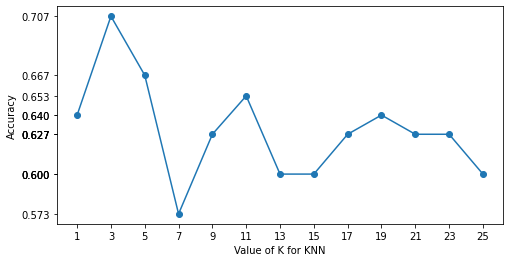

In [45]:
#plotting the visualisation for accuracy_score
plt.figure(figsize=(8,4))
plt.plot(r, nn, marker ="o")
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.xticks(r)
plt.yticks(nn)
plt.show()

#### Highest cv_score & std_dev with k-neighbours 

In [46]:
r = range(1,27,2)
nn = []
for k in r:
    knn_mod5 = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    scores   = cross_val_score(knn_mod5, X, y, cv=5)
    cv_score_mean = scores.mean().round(3)
    cv_score_std  = scores.std().round(3)
    nn.append(cv_score_mean)
dd = pd.DataFrame(data={'Kvalue':r, 'Score':nn, 'Std_dev':cv_score_std})
dd

,Kvalue,Score,Std_dev
0,1,0.607,0.054
1,3,0.650,0.054
2,5,0.631,0.054
3,7,0.621,0.054
4,9,0.608,0.054
5,11,0.621,0.054
6,13,0.622,0.054
7,15,0.626,0.054
8,17,0.617,0.054
9,19,0.603,0.054


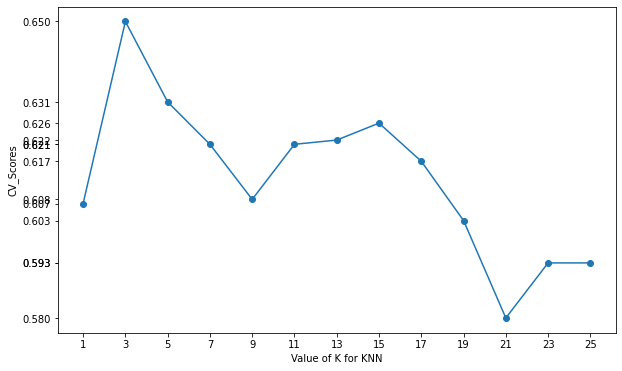

In [47]:
#plotting the visualisation for cv_score
plt.figure(figsize=(10,6))
plt.plot(r, nn, marker ="o")
plt.xlabel('Value of K for KNN')
plt.ylabel('CV_Scores')
plt.xticks(r)
plt.yticks(nn)
plt.show()

### Let's try out with grid search cv

In [48]:
knn_mod5 = KNeighborsClassifier()

In [49]:
neighbrs = range(1,21,2)
metrik   = ['euclidean', 'minkowski', 'cosine', 'manhattan']

gd = GridSearchCV(estimator = knn_mod5, param_grid = {'n_neighbors' : neighbrs, 'metric' : metrik}, cv=5)
gd.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'minkowski', 'cosine',
                                    'manhattan'],
                         'n_neighbors': range(1, 21, 2)})

In [50]:
gd.best_params_

{'metric': 'manhattan', 'n_neighbors': 3}

In [51]:
gd.best_score_

0.6498338870431895

### Finalising Model with gridsearch result

In [52]:
knn_mod6 = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_mod6.fit(X_train, y_train)
y_pred_test = knn_mod6.predict(X_test)

In [53]:
confusion_matrix(y_test, y_pred_test)

array([[20,  4,  0,  0,  0,  0],
       [ 6, 21,  0,  0,  0,  0],
       [ 4,  2,  0,  0,  0,  0],
       [ 0,  1,  0,  2,  0,  2],
       [ 0,  0,  0,  0,  2,  1],
       [ 1,  0,  0,  0,  1,  8]], dtype=int64)

In [54]:
accuracy_score(y_test, y_pred_test).round(2)

0.71

### Using KFold to determine the performance & deviation in accuracy of our model 

In [55]:
scores   = cross_val_score(knn_mod6, X, y, cv=5)
cv_score_mean = scores.mean().round(3)
cv_score_std  = scores.std().round(3)

In [56]:
cv_score_mean, cv_score_std

(0.65, 0.049)

### Conclusion: The overall accuracy for model 6 is 65% and also std dev is approx 5% for the model. Hence, we can consider model 6 for the dataset, since it has high accuracy and also low std deviation. 